In [ ]:

import pandas as pd
# https://pandas.pydata.org/docs/

import numpy as np
# https://numpy.org/doc/stable/about.html

from math import sqrt
# https://docs.python.org/3/library/math.html
from datetime import datetime
# https://docs.python.org/3/library/datetime.html

from matplotlib import pyplot as plt
# https://matplotlib.org/index.html
import seaborn as sns
# https://seaborn.pydata.org/

from sklearn.metrics import mean_squared_error
# https://scikit-learn.org/stable/getting_started.html

from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
# https://www.statsmodels.org/stable/index.html

from scipy import stats
# https://docs.scipy.org/doc/scipy/reference/


In [ ]:
data = pd.read_csv('AirPassengers.csv')

In [ ]:
data.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
# Datatypes
print(data.dtypes)

Month          object
#Passengers     int64
dtype: object


In [ ]:
# Index
data.index

RangeIndex(start=0, stop=144, step=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
data['Month']=pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [ ]:
ts = data['#Passengers']
ts.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [ ]:
#specific to the index
ts['1949-01-01']

112

In [ ]:
#For range
ts['1949-01-01':'1949-05-01']

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
#if one index is at the end
ts[:'1949-05-01']

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
#All rows of 1949
ts['1949']

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [ ]:
july_data = ts[ts.index.month == 7]
print(july_data)

Month
1949-07-01    148
1950-07-01    170
1951-07-01    199
1952-07-01    230
1953-07-01    264
1954-07-01    302
1955-07-01    364
1956-07-01    413
1957-07-01    465
1958-07-01    491
1959-07-01    548
1960-07-01    622
Name: #Passengers, dtype: int64


In [ ]:
data['DayOfTheWeek'] = data.index.dayofweek
data['WeekDay'] = (data['DayOfTheWeek'] < 5).astype(int)

In [ ]:
data['DayOfTheWeek'].head(5)

,DayOfTheWeek
Month,
1949-01-01,5
1949-02-01,1
1949-03-01,1
1949-04-01,4
1949-05-01,6


In [ ]:
data['WeekDay'].head(5)

,WeekDay
Month,
1949-01-01,0
1949-02-01,1
1949-03-01,1
1949-04-01,1
1949-05-01,0


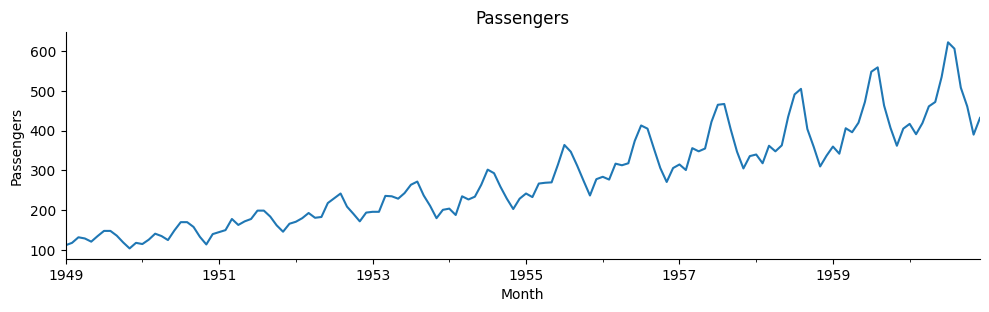

In [ ]:
#Passenger PLOT
ts.plot(figsize=(10,3))
plt.ylabel('Passengers')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Passengers')
sns.despine(top=True)
plt.show()

In [ ]:
ts.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
# Generate date range
date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

## Visualization

In [ ]:
month_arr = []
year_arr = []
year = 1949
indexCol = []
for i in range(len(data['#Passengers'])):
  year_arr.append(year)
  indexCol.append(i+1)
  if((i+1)%12>0):
    month_arr.append((i+1)%12)
  else:
    month_arr.append(12)
    year = year + 1

In [ ]:
data['Month_num'] = month_arr
data['Year_num'] = year_arr
data['indexCol'] = indexCol

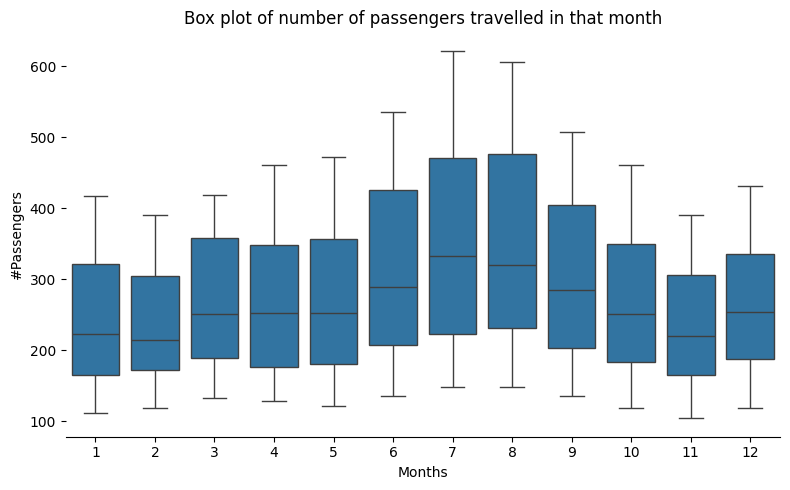

In [ ]:
#Box plot
plt.figure(figsize=(8,5))
sns.boxplot(x="Month_num", y="#Passengers", data=data)
plt.xlabel('Months')
plt.title('Box plot of number of passengers travelled in that month')
sns.despine(left=True)
plt.tight_layout()
plt.savefig('BoxPlot_Passengers_monthly.pdf', dpi=1400)
plt.show()

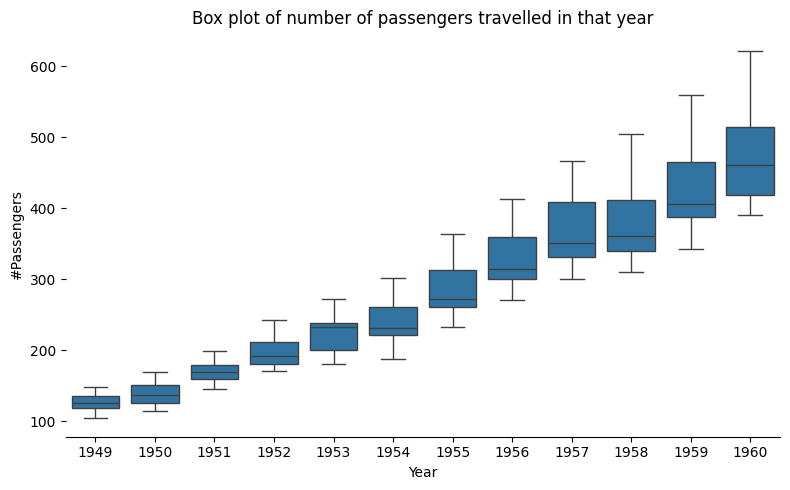

In [ ]:
#Box plot
plt.figure(figsize=(8,5))
sns.boxplot(x="Year_num", y="#Passengers", data=data)
plt.xlabel('Year')
plt.title('Box plot of number of passengers travelled in that year')
sns.despine(left=True)
plt.tight_layout()
plt.savefig('BoxPlot_Passengers_year.pdf', dpi=1400)
plt.show()

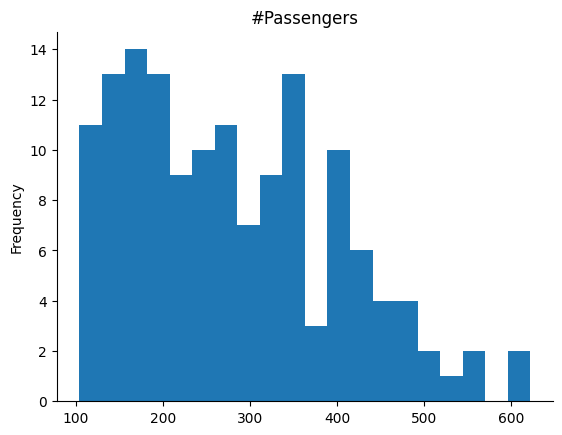

In [ ]:
from matplotlib import pyplot as plt
data['#Passengers'].plot(kind='hist', bins=20, title='#Passengers')
plt.gca().spines[['top', 'right',]].set_visible(False)

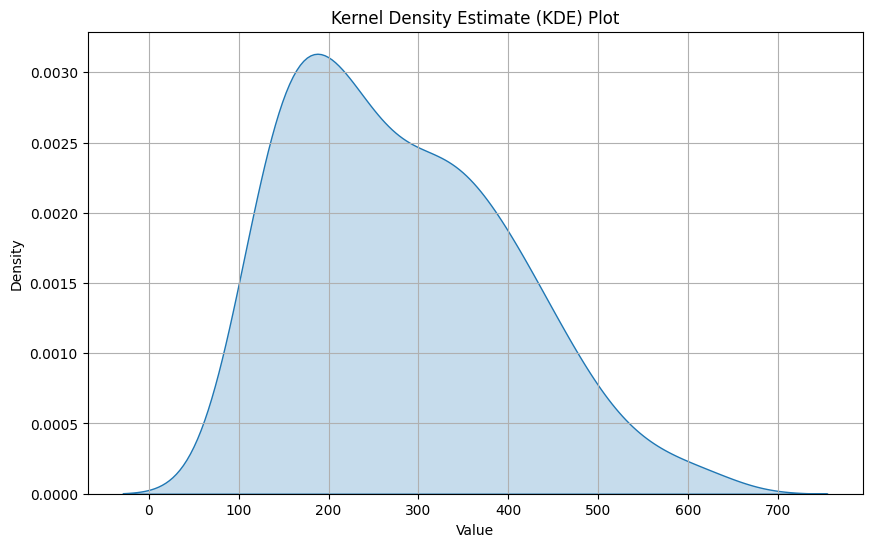

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['#Passengers'], fill=True)
plt.title('Kernel Density Estimate (KDE) Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [ ]:
print( 'Kurtosis: {}'.format(stats.kurtosis(data['#Passengers'])))
print( 'Skewness: {}'.format(stats.skew(data['#Passengers'])))

Kurtosis: -0.39377217091281036
Skewness: 0.577068234901525


**Kurtosis**: describes heaviness of the tails of a distribution

**Skewness**: measures asymmetry of the distribution

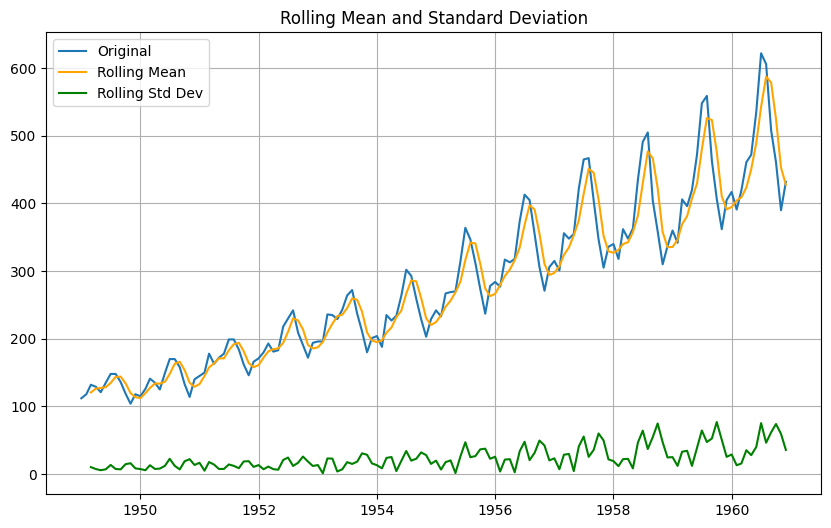

In [ ]:
# Calculate rolling mean and standard deviation
rolling_mean = data['#Passengers'].rolling(window=3).mean()
rolling_std = data['#Passengers'].rolling(window=3).std()

# Line plot with rolling mean and std deviation
plt.figure(figsize=(10, 6))
plt.plot(data['#Passengers'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='orange')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.title('Rolling Mean and Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df = pd.read_csv("ambient_temperature_system_failure.txt")

<Axes: xlabel='y(t)', ylabel='y(t + 2)'>

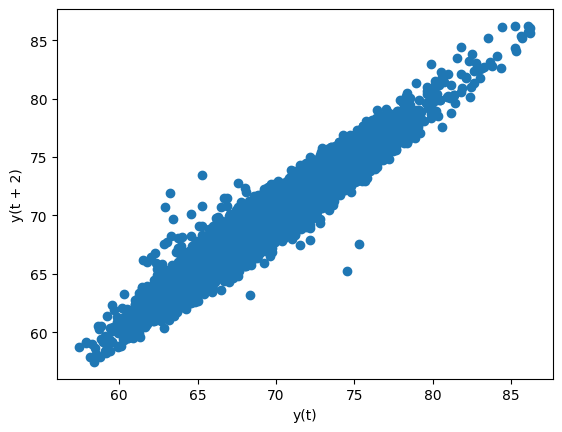

In [ ]:
pd.plotting.lag_plot(df['value'], lag=2)

**Various components of time series**
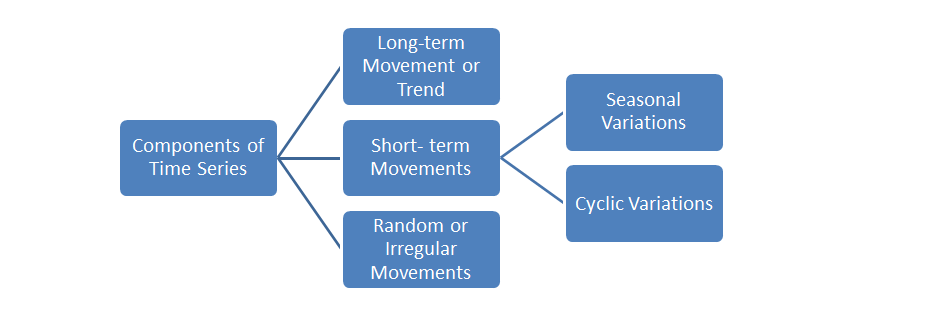


> **1.   Long-term or Trend:**

> The trend shows the general tendency of the data to increase or decrease during a long period of time

> **2.   Short-term movements or Periodic fluctuations:**

> There are some components in a time series which tend to repeat themselves over a certain period of time. These can be of two types:

> *   Seasonal variations:

> > > These are the rhythmic forces which operate in a regular and periodic manner over a span of less than a year.

> *   Cyclic variations:

> > > The variations in a time series which operate themselves over a span of more than one year are the cyclic variations.


> **3. Random or irregular movements**

> Another factor which causes the variation in the variable under study is random movements. They are not regular variations and are purely random or irregular.



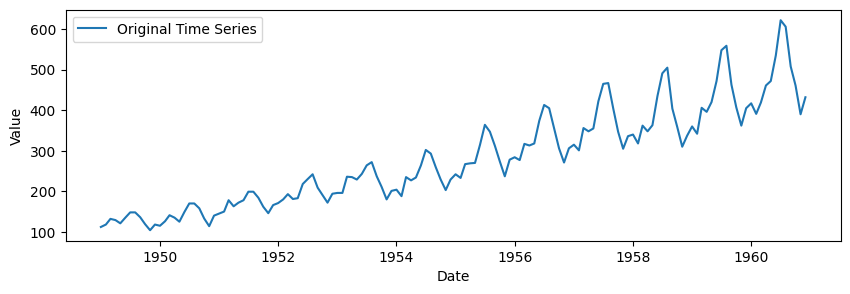

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(data['#Passengers'], label='Original Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
window_size = 12
trend_estimate = data['#Passengers'].rolling(window=window_size, center=True).mean()

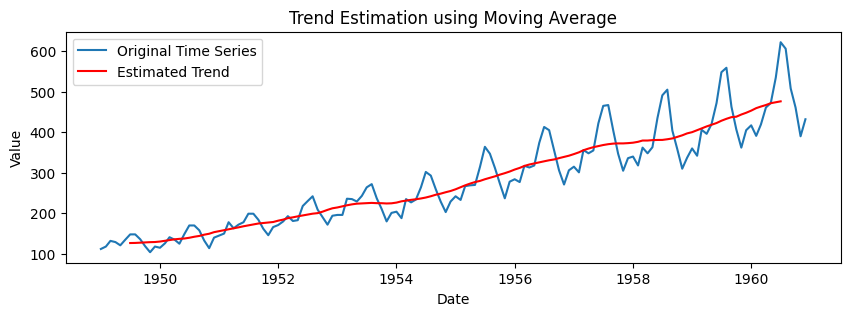

In [ ]:
# Plot the trend component
plt.figure(figsize=(10, 3))
plt.plot(data['#Passengers'], label='Original Time Series')
plt.plot(trend_estimate, label='Estimated Trend', color='red')
plt.title('Trend Estimation using Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
#Extract the Seasonal Component by Subtracting the Trend
detrended = data['#Passengers'] - trend_estimate

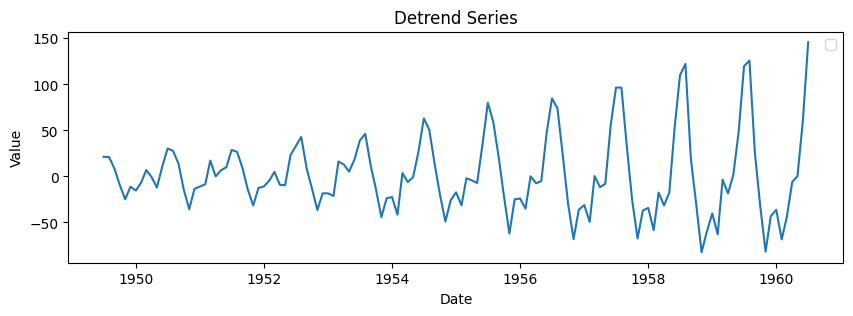

In [ ]:
# Plot the trend component
plt.figure(figsize=(10, 3))
plt.plot(detrended)
plt.title('Detrend Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# Estimate the seasonal component by averaging the detrended series for each period
seasonality_estimate = detrended.groupby(detrended.index.month).mean()

In [ ]:
print(seasonality_estimate)

Month
1    -23.704545
2    -35.204545
3     -1.583333
4     -7.492424
5     -4.174242
6     35.840909
7     71.034722
8     63.106061
9     16.856061
10   -20.136364
11   -53.015152
12   -27.856061
Name: #Passengers, dtype: float64


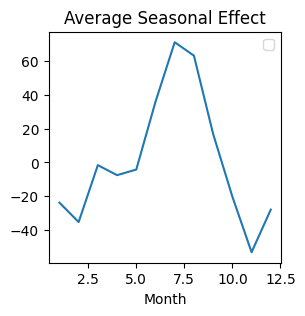

In [ ]:
# Plot the seasonal component
plt.figure(figsize=(3, 3))
plt.plot(seasonality_estimate)
plt.title('Average Seasonal Effect')
plt.xlabel('Month')
plt.legend()
plt.show()

In [ ]:
# Repeat the seasonal pattern to match the length of the time series
n=len(data)
seasonality_full = pd.Series(np.tile(seasonality_estimate, n // 12 + 1)[:n], index=data.index)

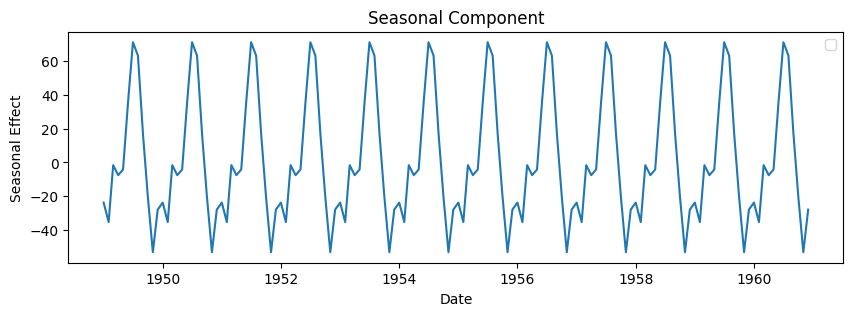

In [ ]:
# Plot the seasonal component
plt.figure(figsize=(10, 3))
plt.plot(seasonality_full)
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')
plt.legend()
plt.show()

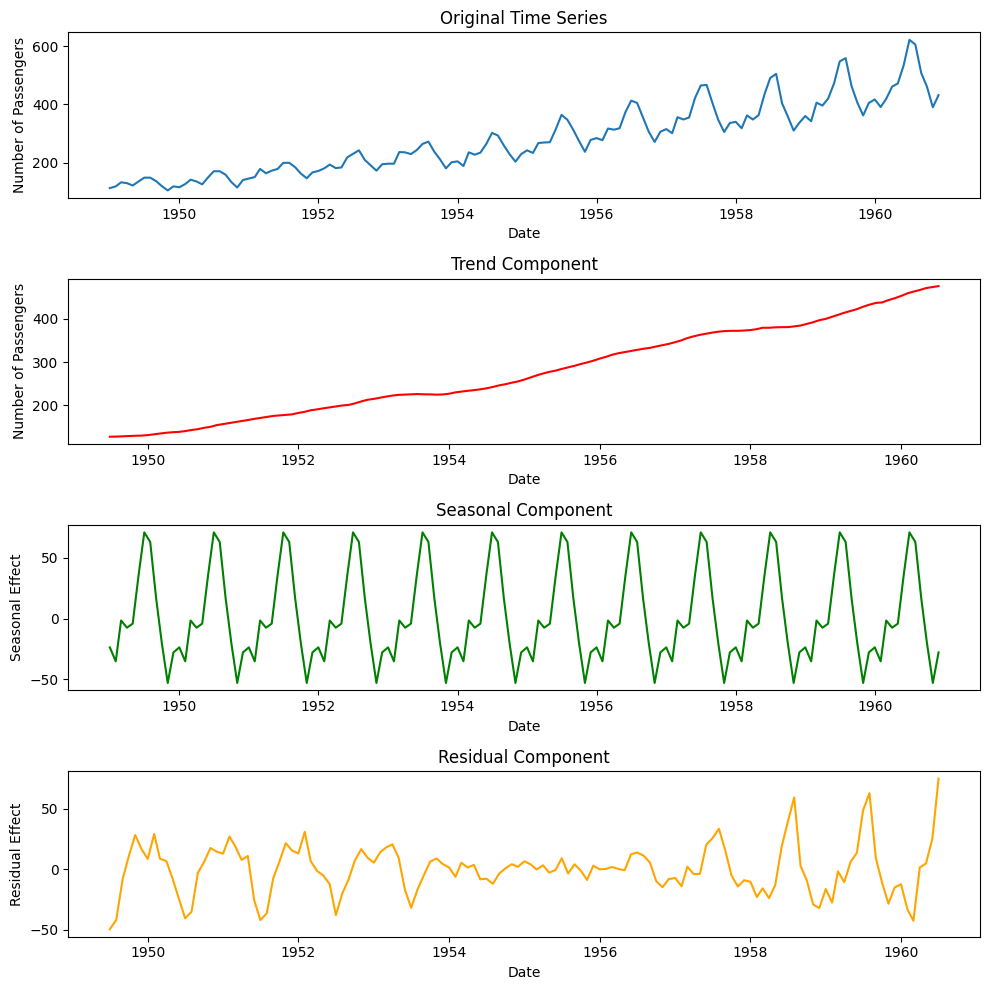

In [ ]:
# Calculate the residual component
residual = data['#Passengers'] - trend_estimate - seasonality_full

# Plot the decomposed components
plt.figure(figsize=(10,10))

plt.subplot(4, 1, 1)
plt.plot(data['#Passengers'], label='Original Time Series')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')

plt.subplot(4, 1, 2)
plt.plot(trend_estimate, label='Trend Component', color='red')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')

plt.subplot(4, 1, 3)
plt.plot(seasonality_full, label='Seasonal Component', color='green')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual Component', color='orange')
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Residual Effect')

plt.tight_layout()
plt.show()

**STATIONARITY**

This is a very important concept in Time Series Analysis. In order to apply a time series model, it is important for the Time series to be stationary; in other words all its statistical properties (mean,variance) remain constant over time. This is done basically because if you take a certain behavior over time, it is important that this behavior is same in the future in order for us to forecast the series.

In practice we can assume the series to be stationary if it has constant statistical properties over time and these properties can be:

*   **constant mean**
*   **constant variance**
* **An auto co-variance that does not depend on time**

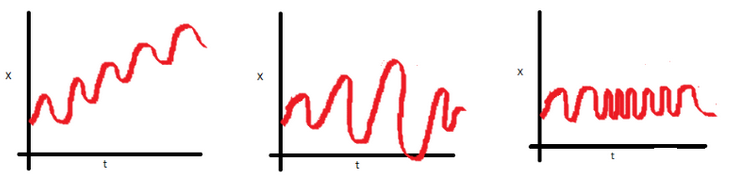



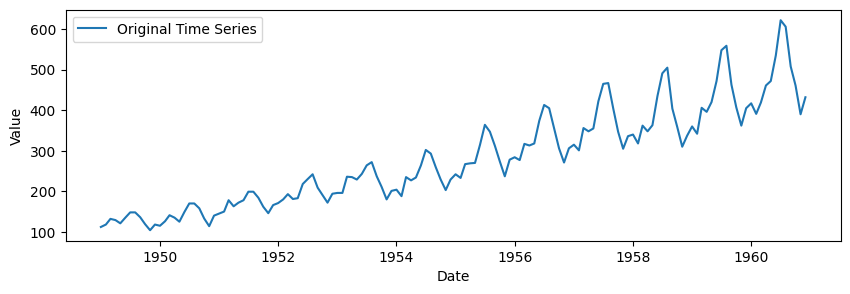

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(data['#Passengers'], label='Original Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

It’s clear from the plot that there is an overall upward trend,with some seasonality in it

Plotting Rolling Statistics :The function will plot the moving mean or moving Standard Deviation. This is still visual method

NOTE: moving mean and moving standard deviation — At any instant ‘t’, we take the mean/std of the last year which in this case is 12 months)

**Dickey-fuller Test** :This is one of the statistical tests for checking stationarity. First we consider the null hypothesis: the time series is non- stationary. The result from the test will contain the test statistic and critical value for different confidence levels. The idea is to have Test statistics less than critical value, i.e. we can reject the null hypothesis and say that this Time series is indeed stationary

**Results of ADF test**: The ADF tests gives the following results – test statistic, p value and the critical value at 1%, 5% , and 10% confidence intervals.


**Test for stationarity**: If the test statistic is less than the critical value, we can reject the null hypothesis (i.e the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).

In [ ]:
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

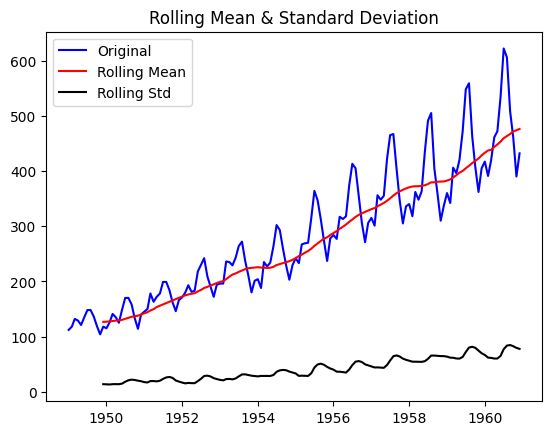

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
test_stationarity(data['#Passengers'])

This is not stationary because :

*   mean is increasing even though the std is small
*   Test stat is > critical value


There are two major factors that make a time series non-stationary. They are:


*   **Trend**: non-constant mean
*   **Seasonality**: Variation at specific time-frames


The basic idea is to model the trend and seasonality in this series, so we can remove it and make the series stationary. Then we can go ahead and apply statistical forecasting to the stationary series. And finally we can convert the forecasted values into original by applying the trend and seasonality constrains back to those that we previously separated

**Removing Trend**


*   Lag Differencing (First order, Second order)
*   Log Transformation
*   Combining differencing and log transformation
*   Detrending

**Removing Trend and Seasonality**

*   Decomposition

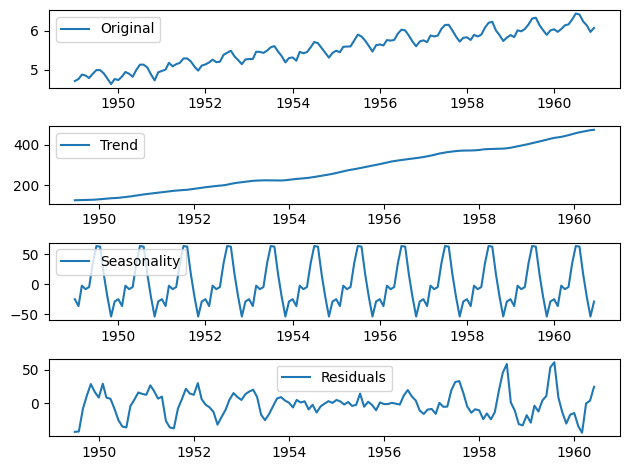

In [ ]:
decomposed = seasonal_decompose(data['#Passengers'])

trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

plt.subplot(411)
plt.plot(all_data_log, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

Remove the trend and seasonality from the Time series and now we can use the residual values.

# Correlation, Autocorrelation (ACF), Partial autocorrelation (PACF)

**Autocorrelation (ACF):**

Just as correlation measures the extent of a linear relationship between two variables, autocorrelation measures the linear relationship between lagged values of a time series.

There are several autocorrelation coefficients, corresponding to each panel in the lag plot. For example, $r_1$ measures the relationship between $y_t$ and $y_{t−1}$, $r_2$ measures the relationship between $y_t$ and $y_{t−2}$, and so on.


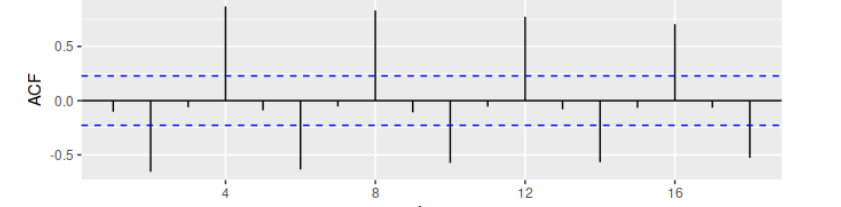





In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

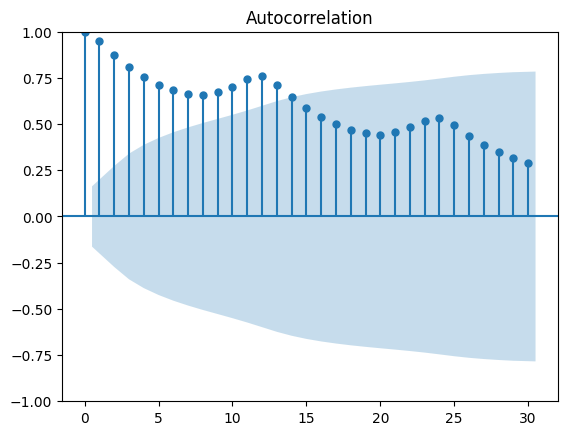

In [ ]:
plot_acf(data['#Passengers'], lags=30)
plt.show()

**Interpretation (Trend and seasonality in ACF plots**)
>When data have a trend, the autocorrelations for small lags tend to be large and positive because observations nearby in time are also nearby in size. So the ACF of trended time series tend to have positive values that slowly decrease as the lags increase.

>When data are seasonal, the autocorrelations will be larger for the seasonal lags (at multiples of the seasonal frequency) than for other lags.

>When data are both trended and seasonal, you see a combination of these effects.

**PACF**


 > Partial Autocorrelation is finding the correlation between present$(x_t)$ and random lags value $(x_{t-h})$. Hence, the correlation in the middle values like $(x_{t-1}), (x_{t-2}), (x_{t-3}) ... (x_{t-(h-1)})$ will not be taken into account.

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

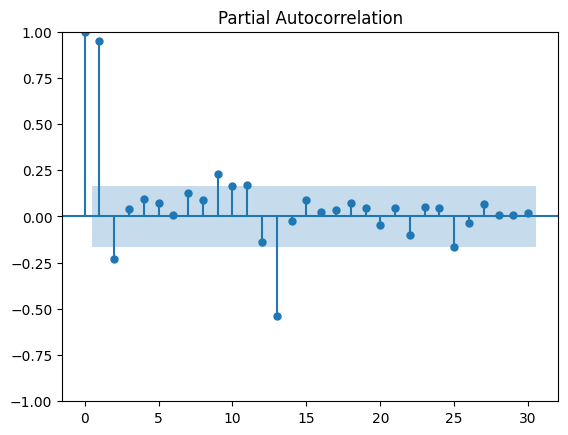

In [ ]:
plot_pacf(data['#Passengers'], lags=30)
plt.show()